# Loading data:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
from dt import *
from rfc import *
from svm import *
from lr import *

In [2]:
import pandas as pd 
import csv

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# col_list=['screen_name','tweet','hashtag','url','#retweets','#favorites','label']
col_list=['screen_name','tweet','label']
df=pd.read_csv('C:/ds4cg2020/data/labeledtweets-flu.csv', usecols =col_list) 
df2=pd.read_csv('C:/ds4cg2020/data/january_flu_tweets.csv', usecols =col_list)
# df['burl'] = df['url'].apply(lambda x: 1 if not pd.isnull(x) else 0)
# df['bhashtag'] = df['hashtag'].apply(lambda x: 1 if len(x) > 4 else 0)




In [3]:
def clean_df(df):
    forbidden_keys="kung flu"
    for i,v in enumerate(df['tweet']):
    if forbidden_keys in df.at[i,'tweet'].lower():
        df.at[i,'label']=np.nan
    df=df.dropna(subset=['label'])
    df=df[df.label != '?']
    df=df[df.label != 'no content']
    df=df.sort_values(by=['label'])
    return df

# df=df.drop(df.index[170:255])
# df=df.drop(df['#retweets'],axis=1)

In [4]:
df=clean_df(df)

In [5]:
df.label.value_counts()

TRUE    212
Fake    162
Name: label, dtype: int64

In [6]:
df2=clean_df(df2)

In [7]:
df2.label.value_counts()

Fake    30
TRUE    14
Name: label, dtype: int64

In [8]:
df=df.append(df2)

In [9]:
df.label.value_counts()

TRUE    226
Fake    192
Name: label, dtype: int64

In [27]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def preprocess(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub("[^a-zA-Z]", " ",text)
    text = text.lower()# lowercase text
    text = REPLACE_BY_SPACE_RE.sub(" ",text)# replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub("",text)# delete symbols which are in BAD_SYMBOLS_RE from text
    text = " ".join([word for word in text.split() if word not in STOPWORDS])# delete stopwords from text
    text=text.replace("#","")
    
    return text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nazan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nazan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
tweets=df['tweet'].values 
preprocessed_tweets=[]
for t in tweets:
    preprocessed_tweets.append(preprocess(t))

In [29]:
preprocessed_tweets

['death rate lower seasonal flu coronavirushoax openamericanow',
 'juliansrum coronavirus cases influenza cases symptoms used diagnose coronavirus flu influenza positive cases week time covid cases rise',
 'klfy hoax farce worse seasonal flu hype politically motivated almost flu cases claimed covid china based virus coronavirus covid different strain seasonal flu klfy research',
 'outrage new york medical community moved deaths month heartdisease cancer accidents stroke alzheimer homicide etc covid column coronavirus chinavirus faucifraud firefauci firebirx defundcdc nyc govcoumo newyorkfraud flu fraud',
 'dikell govmikedewine dianne flu season infections covid world th coronavirus wear past seasons',
 'corona covid coronakrise coronsvirus covid',
 'well gone million die coronavirus may less deadly flu new study found sars cov virus linked covid maybe five times widespread previously thought therefore five times less deadly',
 'paulnuki st century sham mismanagement hardly worse flu am

# Feature extraction-BOW:

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(preprocessed_tweets)
# summarize
# encode document
vector = vectorizer.transform(preprocessed_tweets)
feature_names=vectorizer.get_feature_names()
# summarize encoded vector
f1=vector.toarray()

In [31]:
f1.shape

(418, 2753)

# tfidvectorizer

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(preprocessed_tweets)
X2=vectorizer.transform(preprocessed_tweets)    
print(vectorizer.get_feature_names())
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
print(X2.shape)


['aaronblake', 'aarp', 'aberrant', 'able', 'absolute', 'absolutely', 'academy', 'acceleratesc', 'accepted', 'accepting', 'accidents', 'according', 'account', 'accountable', 'accurate', 'achd', 'acosta', 'across', 'act', 'active', 'actual', 'actually', 'actuarial', 'ad', 'adams', 'adapting', 'added', 'addiction', 'addition', 'adherent', 'admin', 'admitting', 'adult', 'afa', 'affected', 'affecting', 'afraid', 'africa', 'age', 'agencies', 'agenda', 'agendas', 'ages', 'aggressively', 'ago', 'agree', 'agrees', 'ahead', 'aid', 'aids', 'ailments', 'air', 'ajayquirke', 'aka', 'ala', 'alarming', 'alert', 'alertlevel', 'alford', 'aljazeera', 'allahuakbar', 'alleged', 'allergist', 'allergy', 'allowed', 'allowing', 'almost', 'alone', 'along', 'alongside', 'alot', 'already', 'also', 'altogether', 'always', 'alzheimer', 'amazingly', 'america', 'american', 'americans', 'amid', 'among', 'amount', 'amp', 'amphitheaters', 'amykosari', 'anchors', 'ands', 'angel', 'angela', 'animals', 'anneconnollyabc', '

# Other network related features

In [33]:
preprocessed_tweets

['death rate lower seasonal flu coronavirushoax openamericanow',
 'juliansrum coronavirus cases influenza cases symptoms used diagnose coronavirus flu influenza positive cases week time covid cases rise',
 'klfy hoax farce worse seasonal flu hype politically motivated almost flu cases claimed covid china based virus coronavirus covid different strain seasonal flu klfy research',
 'outrage new york medical community moved deaths month heartdisease cancer accidents stroke alzheimer homicide etc covid column coronavirus chinavirus faucifraud firefauci firebirx defundcdc nyc govcoumo newyorkfraud flu fraud',
 'dikell govmikedewine dianne flu season infections covid world th coronavirus wear past seasons',
 'corona covid coronakrise coronsvirus covid',
 'well gone million die coronavirus may less deadly flu new study found sars cov virus linked covid maybe five times widespread previously thought therefore five times less deadly',
 'paulnuki st century sham mismanagement hardly worse flu am

In [ ]:
f2=df['burl'].values
f2 = np.expand_dims(f2, axis=1)
f3=df['bhashtag'].values
f3 = np.expand_dims(f3, axis=1)

from sklearn import preprocessing

f4 = df[['#retweets']].values #returns a numpy array
print(f4.shape)
min_max_scaler = preprocessing.MinMaxScaler()
f4= min_max_scaler.fit_transform(f4)
f5 = df[['#favorites']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
f5= min_max_scaler.fit_transform(f5)

# Bigram Feature:

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
bigram_vectorizer = CountVectorizer(analyzer='word',ngram_range=(2, 2))
X3 = bigram_vectorizer.fit_transform(preprocessed_tweets).toarray()
scaler = StandardScaler()
scaler.fit(X3)
X3 = scaler.transform(X3)

In [35]:
X3.shape

(418, 6319)

# POS feature

In [36]:
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
from collections import Counter
df['token'] = df.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)
df['pos_tags'] = df.apply(lambda row: nltk.pos_tag(row['token']), axis=1)

tag_count_df = pd.DataFrame(df['pos_tags'].map(lambda x: Counter(tag[1] for tag in x)).to_list())
tag_count_df=tag_count_df.fillna(0)
# df = pd.concat([df, tag_count_df], axis=1).fillna(0).drop(['pos_tags', 'token'], axis=1)
df=df.drop(['pos_tags', 'token'], axis=1)
X4 = tag_count_df

scaler.fit(X4)
X4 = scaler.transform(X4)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nazan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [54]:
X5=np.concatenate((f1,X4),axis=1)
X6=np.concatenate((X3,X4),axis=1)

# Training decision tree

In [ ]:
dt=DecisionTree(RSEED=50,MAX_DEPTH=20)

# Logistic Regression

In [44]:
lrc=LRegression()

In [55]:
def experiment(feature_set,model):
    X=0
    y=df['label'].values
    if feature_set=="BOW":
        print("BOW")
        print()
        X=f1
        indices = np.arange(len(X))
        y=df['label'].values
    if feature_set=="BIGRAM":
        print("BIGRAM")
        print()
        X=X3
        indices = np.arange(len(X))
        y=df['label'].values
    if feature_set=="POS":
        print("POS")
        print()
        X=X4
        indices = np.arange(len(X))
        y=df['label'].values
    if feature_set=="posbow":
        print("POS+BOW")
        print()
        X=X5
        indices = np.arange(len(X))
    if feature_set=="posbigram":
        print("POS+BIGRAM")
        print()
        X=X6
        indices = np.arange(len(X)) 
        
    if model==svm:
        svm.train(X,y)
    else:
        clf,test_X, y_test,y_train,train_X=model.train(X,y)
        y_test,predictions=model.evaluate(clf,test_X, y_test,y_train,train_X)
        cm = confusion_matrix(y_test, predictions)
        print(feature_set)
        print()
        print()
        plot_confusion_matrix(cm, classes = ['Fake', 'True'],
                                    title = 'Misinformation Confusion Matrix')
    
    

In [52]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                            normalize=False,
                            title='Confusion matrix',
                            cmap=plt.cm.Oranges):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        plt.figure(figsize = (10, 10))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title, size = 24)
        plt.colorbar(aspect=4)
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45, size = 14)
        plt.yticks(tick_marks, classes, size = 14)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        
        # Labeling the plot
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
            
        plt.grid(None)
        plt.tight_layout()
        plt.ylabel('Real label', size = 18)
        plt.xlabel('Predicted label', size = 18)

In [56]:


print("-------------")
print("SVM")
print("-------------")
# experiment("BOW",svm)
# experiment("BIGRAM",svm)
# experiment("POS",svm)
# experiment("posbow",svm)
experiment("posbigram",svm)



-------------
SVM
-------------
POS+BIGRAM

[0.38095238 0.52380952 0.61904762 0.42857143 0.5        0.5
 0.64285714 0.61904762 0.65853659 0.34146341]
0.5214285714285715


In [57]:
rf=RandomForest(RSEED=50,MAX_DEPTH=20,n_estimators=100)


-------------
RANDOM FOREST
-------------
BOW

Model Accuracy: 0.7619047619047619
Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.7448512585812357
{'recall': 0.5789473684210527, 'precision': 0.8461538461538461, 'roc': 0.7448512585812357}
BOW


Confusion matrix, without normalization
[[11  8]
 [ 2 21]]
BIGRAM

Model Accuracy: 0.5952380952380952
Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.7002288329519452
{'recall': 0.15789473684210525, 'precision': 0.75, 'roc': 0.7002288329519452}
BIGRAM


Confusion matrix, without normalization
[[ 3 16]
 [ 1 22]]
POS

Model Accuracy: 0.6666666666666666
Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.6407322654462243
{'recall': 0.47368421052631576, 'precision': 0.6923076923076923, 'roc': 0.6407322654462243}
POS


Confusion matrix, without normalization
[[ 9 10]
 [ 4 19]]
POS+BOW

Model Accuracy: 0.7380952380952381
Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.7505720823798627
{'recall': 0.5263157894736842, 'precision': 0.8333333333333334, 'roc': 0

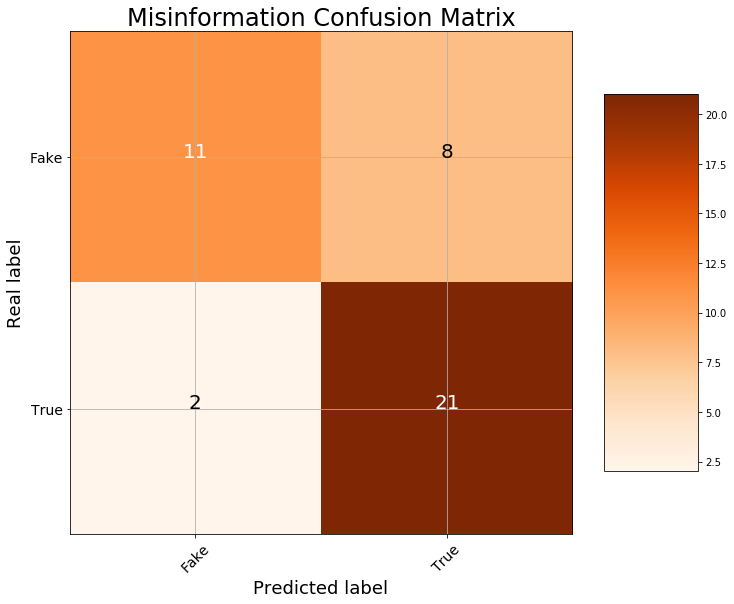

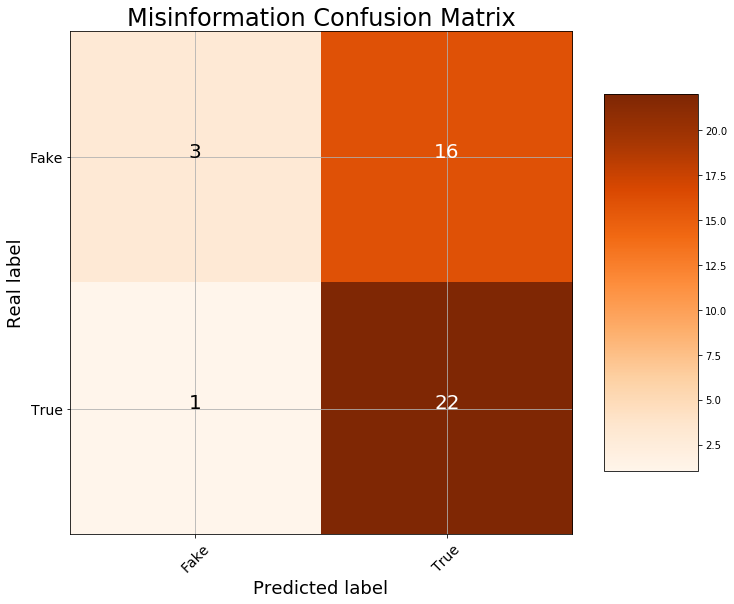

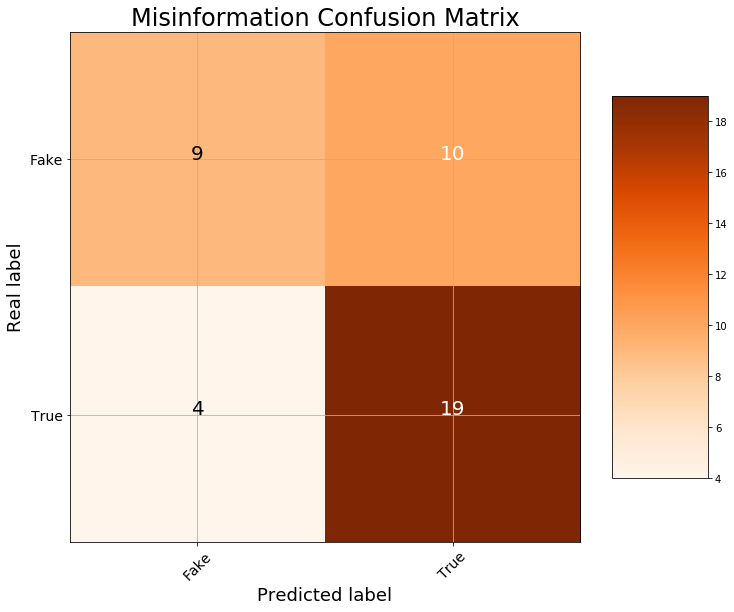

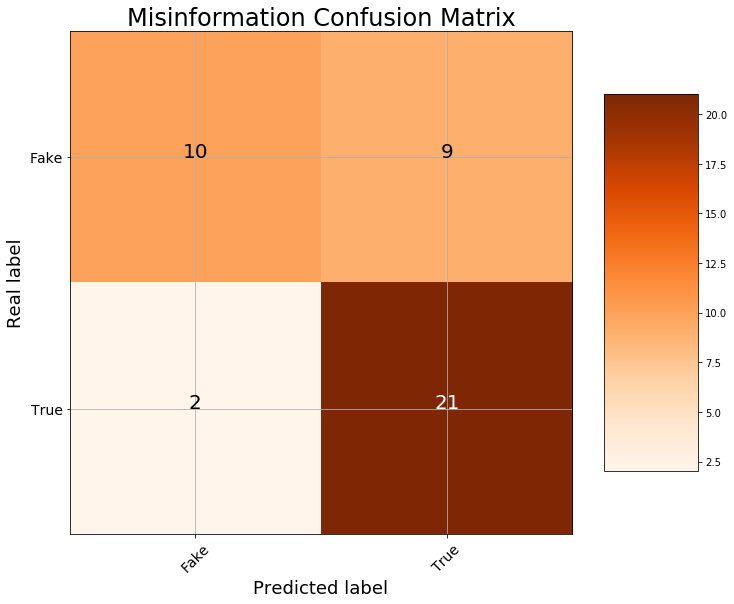

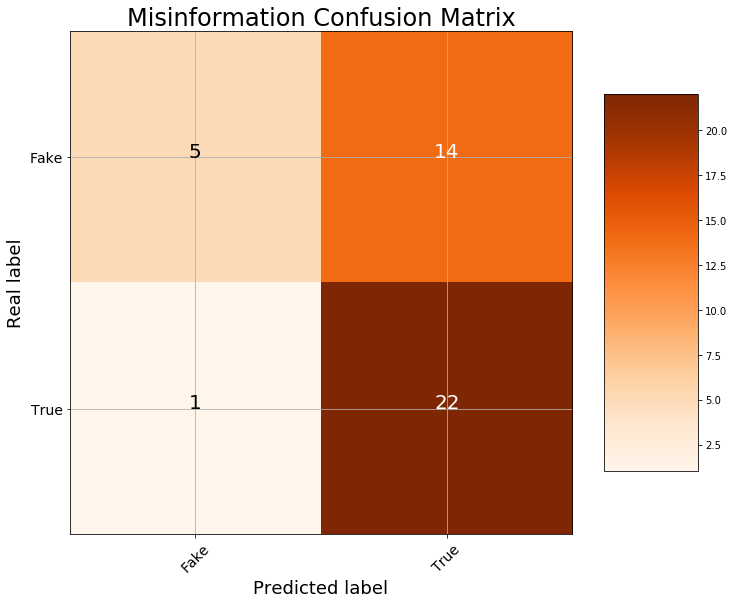

In [58]:
print("-------------")
print("RANDOM FOREST")
print("-------------")
experiment("BOW",rf)
experiment("BIGRAM",rf)
experiment("POS",rf)
experiment("posbow",rf)
experiment("posbigram",rf)

-------------
LR
-------------
BOW

Model Accuracy: 0.7619047619047619
Train ROC AUC Score: 0.9994162703949429
Test ROC AUC  Score: 0.7208237986270023
{'recall': 0.6842105263157895, 'precision': 0.7647058823529411, 'roc': 0.7208237986270023}
BOW


Confusion matrix, without normalization
[[13  6]
 [ 4 19]]
BIGRAM

Model Accuracy: 0.5714285714285714
Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.6727688787185354
{'recall': 0.05263157894736842, 'precision': 1.0, 'roc': 0.6727688787185354}
BIGRAM


Confusion matrix, without normalization
[[ 1 18]
 [ 0 23]]
POS

Model Accuracy: 0.4523809523809524
Train ROC AUC Score: 0.7471454198581965
Test ROC AUC  Score: 0.38215102974828374
{'recall': 0.3157894736842105, 'precision': 0.375, 'roc': 0.38215102974828374}
POS


Confusion matrix, without normalization
[[ 6 13]
 [10 13]]
POS+BOW

Model Accuracy: 0.6666666666666666
Train ROC AUC Score: 0.999487456932145
Test ROC AUC  Score: 0.620137299771167
{'recall': 0.5263157894736842, 'precision': 0.6666666

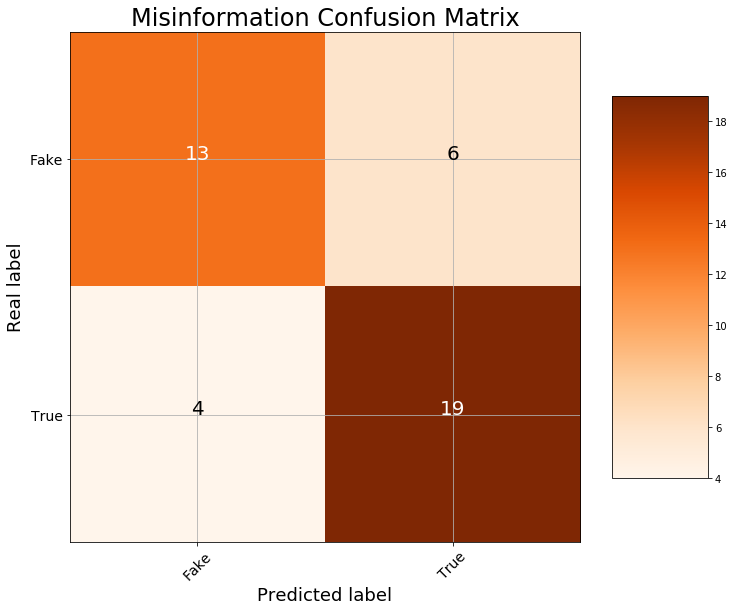

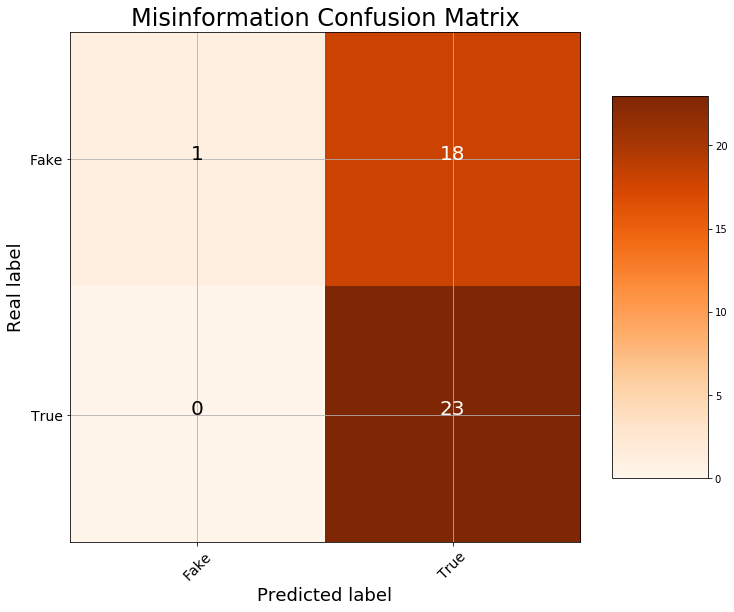

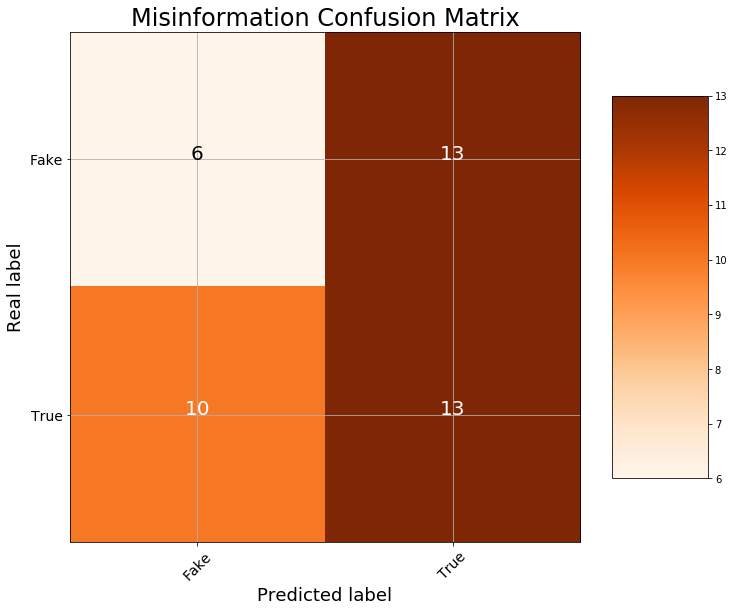

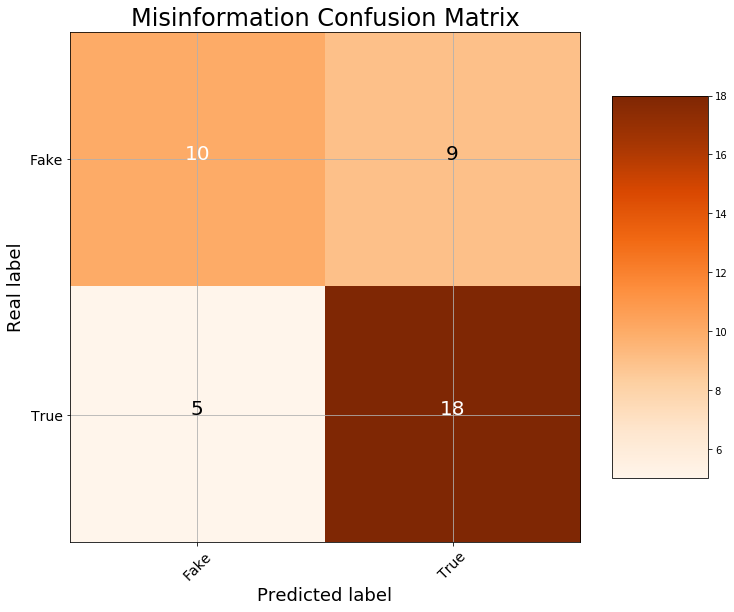

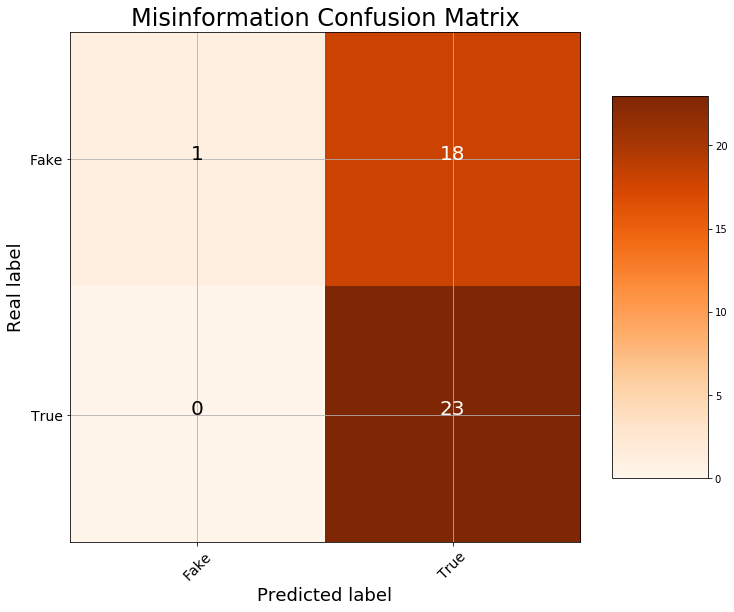

In [59]:
print("-------------")
print("LR")
print("-------------")
experiment("BOW",lrc)
experiment("BIGRAM",lrc)
experiment("POS",lrc)
experiment("posbow",lrc)
experiment("posbigram",lrc)

In [ ]:
df['predicted'] = None

In [ ]:
df.iloc[test_idx, df.columns.get_loc('predicted')] = predictions

In [ ]:
df.iloc[test_idx]

In [ ]:
df.iloc[test_idx]['tweet']

In [ ]:
print(len(bigram_vectorizer.get_feature_names()))

l=bigram_vectorizer.get_feature_names()
print(l[995])

# random forest

In [ ]:
model,test_x,test_y,y_train,train_X=rf.train(X,y)

In [ ]:
rf.evaluate(model,test_x, test_y,y_train,train_X)

# SVM

In [49]:
svm=SVM()


In [ ]:

# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# # define dataset
# X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
# model = DecisionTreeRegressor()
# # fit the model
# model.fit(X, y)
# get importance
importance = model.feature_importances_
l=bigram_vectorizer.get_feature_names()

# summarize feature importance
for i,v in enumerate(importance):
    if v > 0.000:
        print('Feature: %0d, Score: %.5f' % (i,v))
        print(l[i])
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image 
from sklearn import tree

import pydotplus
# dotfile = open("dtree2.dot", 'w')
# tree.export_graphviz(clf, out_file = dotfile, feature_names = bigram_vectorizer.get_feature_names())
# dotfile.close()

# from sklearn.tree import export_graphviz
# import pydotplus
# dotfile = open("dtree2.dot", 'w')
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph,_,_,_= pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [ ]:
from sklearn.tree import export_graphviz
dot_data = tree.export_graphviz(clf,
                                feature_names=bigram_vectorizer.get_feature_names())
graph = pydotplus.graph_from_dot_data(dot_data)


# graph.write_png('tree.png')

In [ ]:
tree.plot_tree(clf)

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=bigram_vectorizer.get_feature_names(),  
                     class_names=["Fake","TRUE"],  
                      filled=True, rounded=True,  
                     special_characters=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='depth10.dot', 
                      feature_names=bigram_vectorizer.get_feature_names(),  
                     class_names=["Fake","TRUE"],  
                      filled=True, rounded=True,  
                     special_characters=True)

In [ ]:
!dot -T png depth10.dot -o depth10.png

In [ ]:
from IPython.display import Image
Image(filename = 'depth10.png')

In [ ]:
# packages to import
import numpy as np
import pylab as pl
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
random_state = np.random.RandomState(0)